In [20]:
import healpy as hp
import numpy as np

nside = 5
npix = hp.nside2npix(nside)
print(npix)
theta, phi = hp.pix2ang(nside, np.arange(npix))

dOmega = 4*np.pi / npix

S_int = np.sum(dOmega + theta * 0)
print(S_int)

300
12.566370614359172


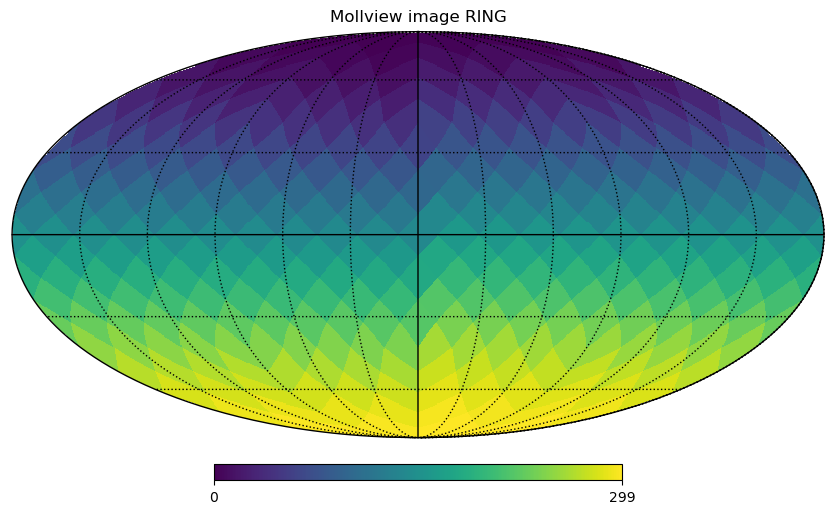

In [21]:
m = np.arange(npix)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

In [12]:
!wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits;wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits



7[Files: 0  Bytes: 0  [0 B/s] Re]87[http://lambda.gsfc.nasa.gov/da]87wmap_band_iqumap_r9_ 100% [=============================>]     299     --.-KB/s87HTTP response 301 Moved Permanently [http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits]
87wmap_band_iqumap_r9_ 100% [=============================>]     299     --.-KB/s87Adding URL: https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits
87[Files: 0  Bytes: 299  [534 B/s]87[Files: 0  Bytes: 299  [299 B/s]87[https://lambda.gsfc.nasa.gov/d]87Saving 'wmap_band_iqumap_r9_7yr_W_v4.fits'
87wmap_band_iqumap_r9_   0% [>                             ]   54.50K    --.-KB/s87[Files: 0  Bytes: 299  [149 B/s]87wmap_band_iqumap_r9_   0% [>                             ]  374.81K  320.31KB/s87[Files: 0  Bytes: 299  [99 B/s]]87[Files: 0  Bytes: 299  [74 B/s]]87wmap_band_iqumap_r9_   0% [>                             ]  788.87K  367.00KB/s87[File

In [13]:
wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")

In [14]:
hp.write_map("my_map.fits", wmap_map_I, overwrite=True)

setting the output map dtype to [dtype('>f4')]


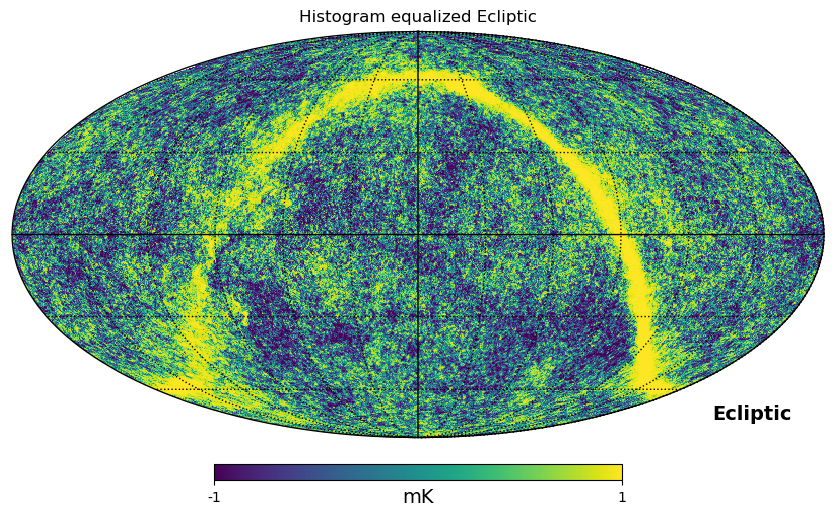

In [15]:
hp.mollview(
    wmap_map_I,
    coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()

In [17]:
LMAX = 1024
cl = hp.anafast(wmap_map_I, lmax=LMAX)
ell = np.arange(len(cl))

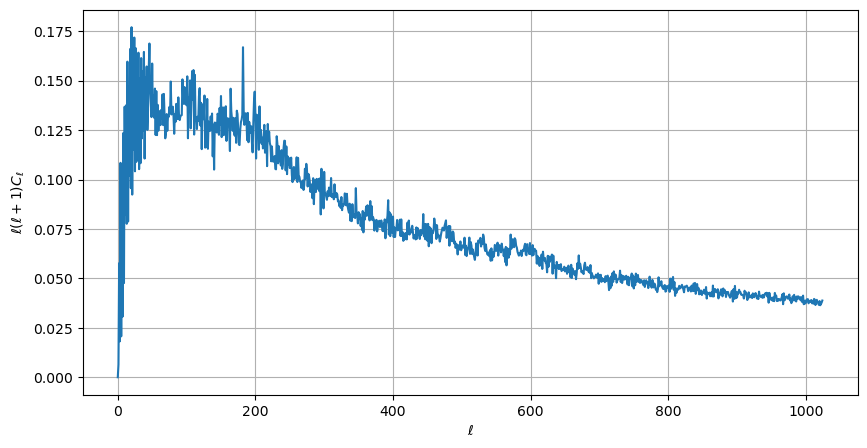

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)